# Tutorial 1
## May 2, 2024

Throughout the course, you will be doing a lot of Python programming and working with medical images.  We have included this tutorial to get you started with some of the basics. You might find more materials in [this manual](https://miagrouput.github.io/intro-programming/) for Python programming, including additional exercises.

<!-- In the past two lectures, we have looked at medical images, filters, neural networks, and convolutional neural networks. The purpose of this tutorial is to put the concepts that you have learned into practice and to get you acquainted with medical image formats and several useful Python packages to manipulate medical images. Moreover, you will get to train your first neural network for image analysis. -->

### Notebooks
What you are looking at right now is called a Jupyter notebook. We will use these for all tutorials in the course. A notebook is a mixture of Markdown cells (with code and figures) and code cells. There is a Python kernel running in the background that can execute your code cells, and keeps track of your variables. This is a bit like a workspace in Matlab. To run a cell, you simply put the cursor in the cell and press <kbd>Shift</kbd> + <kbd>Enter</kbd>. For example, you can run the following cell, and (if all is well) the answer should appear below.

In [2]:
1+1

OSError: [WinError 182] The operating system cannot run %1. Error loading "C:\Users\gijsd\miniconda3\Lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

Given that you are now looking at the notebook, we can assume that you have figured out how to run a Jupyter notebook. Note that there are multiple ways in which you can run a Jupyter notebook.
- You can install a Python distribution like [Anaconda](https://www.anaconda.com/products/distribution) locally on your own computer and use [JupyterLab](https://jupyter.org/) to open this notebook in your browser. 
- You can use [Google Colab](https://colab.research.google.com) to run your notebook in the cloud, attached to your Google account.
- A (preferred) alternative to Google Colab is to run the notebook on the [UT JupyterLab](https://jupyter.utwente.nl/). Here, you can log in with your s-number and you get your own hosted Jupyter environment.
- You can run a notebook in an IDE like Visual Studio Code.


Throughout the tutorials, there are questions, which we indicate with ❓, and programming exercises, which we indicate with ⌨️. 

# Python essentials
For the tutorials, we assume that you have some familiarity with Python and its syntax. If not, there are plenty of resources available online. If you're an avid MATLAB user taking your first steps in Python, [this resource](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) might be useful. 

However, to help you out a bit, we here give a brief introduction to some Python essentials.

## Variables
Like in any programming language, we can store values in containers, which we call variables. For example, we can assign the value `5` to variable `a`:

In [2]:
a = 5

Variables can represent a number, a letter, a string, or anything else. 

In [3]:
b = 2.3
course = 'DLMIA'
year = 2023
letter = 'g'

You can do anything you want with these variables. For example, you can add two variables to make a new variable

In [4]:
c = a + b

Run the cell below to check what the current value of `c` is

In [ ]:
c

Python does not require you to explicitly declare the type of a variable. However, under the hood, variables do have a type. If you want to work with variables, be aware that they have to be of the same type.

:::{admonition} Exercise
:class: tip
What happens if you try to add variables `c` and `course`. Do you understand what it says in the output?
:::

If you are not sure which type a variable has, you can always check it using `type`, as below.

In [ ]:
type(b)

A `float` is one way to represent numbers. Floats have decimals, and hence, Python automatically turns your variable `b` with value 2.3 into a float.

:::{admonition} Exercise
:class: tip
What is the type of the variable `year`?
:::

:::{admonition} Exercise
:class: tip
types are compatible with each other. Can you figure out what type the variable has that you get when you add `year` and `b`?.
:::

If your variable has one type but you want it to have another type, you can 'cast' it to another type as follows

In [ ]:
float(year)

This doesn't always work, but only for types that can be cast into each other. For example, the following should give you an error

In [ ]:
float(letter)

Variable names are case-sensitive. This means that while `b=2.3`, variable `B` is actually undefined. Try it out yourself

In [ ]:
B

## Functions
A function is a block of code that only runs when it's called. The benefit of defining a function is that - if you have to use a piece of code many times - you can easily call it. For example, we can define a function that just says 'Hello world'.

In [ ]:
def greet():
    return 'Hello world'

If you run the cell above, you'll notice that there is no output. That is because the function is not called. To actually see some output we need to call the function like this:

In [ ]:
greet()

Functions can also have arguments. For example, the function below takes two arguments `a` and `b` and adds these. Note that `a` and `b` are just the names of the variables within the function, i.e., within its scope. The function also has a `return` statement, to define what should be its output.

In [ ]:
def add_numbers(a, b):
    return a + b

:::{admonition} Exercise
:class: tip
Use the `add_numbers` function to add 45 and 1281.
:::

Of course, functions can be much more complex than this. We can make new variables within a function and call one function from another function. For example

In [ ]:
def multiply_numbers(a, b):
    return a * b

def my_function(a, b, c):
    d = add_numbers(a, b)
    return multiply_numbers(d, c)

my_function(2, 5, 6)

The sky is the limit. We can put `if`, `elif` and `else` statements in a function, make `for` loops and even call a function from within that same function (recursiveness). For example, we can easily write a function that computes the factorial of a number, i.e., $a!$.

In [ ]:
def factorial(a):
    if a > 0:
        return a * factorial(a - 1)
    else:
        return 1
    
factorial(5)

One important thing to consider when working with functions (and classes) is the scope of a variable. If you define a variable in a function, it will cease to exist when the function is executed. Let's look at the simple example below. If we run this cell, we get an error which says that in the global scope, `u` is not defined.

(Note that the function below does not have a `return` statement. If we leave this out and we don't want to return anything, Python will just add `return None` for us.)

In [ ]:
def manipulate():
    u = 8

u

Conversely, if you define a variable globally, you can read it from within a function, but you cannot change it. Let's look at a very simple example to demonstrate this. In principe, the function `change_e` should set the value of variable `e` to that of `f`. However, because `e` is a global variable, we're not allowed to change it from within this function.

In [ ]:
e = 4

def change_e(f):
    e = f

change_e(6)
e

## Objects
Another essential building block of Python are its objects. In Python, everything is an object. In practice this means that any variable you use has *attributes* and *methods*. You can easily define your own objects by defining a class. An object is nothing more than an instance of such a class. Take for example cars. There are many kinds of cars, but we can come up with a class that captures the general idea of a car with attributed and methods:
* **Attributes** Color, brand, speed
* **Methods** Accelerate, slow down

We can put this in code:

In [ ]:
class Car:

    def __init__(self, color, brand, speed=0): 
        self.color = color
        self.brand = brand
        self.speed = speed
    
    def __call__(self):
        print(f'Toot toot, I am the fastest {self.brand}')        
        
    def accelerate(self):
        self.speed += 1
        
    def slow_down(self):
        self.speed = max(self.speed - 1, 0)      

There are some important things here:
* By convention, we capitalize class names.
* Every class has an `__init__` method/function. This is a function that is called if we instantiate an object of that class. The first argument of the `__init__` function is `self`, and we can use this function to set the attribute values of the object. In this case, `color`, `brand`, and `speed`.
* The `__init__` method of this class has four arguments, but we provide a default value for `speed`, namely `0`. This means that if we call the `__init__` function (by instantiating an object), we don't necessarily have to provide a value for this argument (but we can if we want).
* This class also has a `__call__` function that allows us to call the class like a function.
* This class has two other methods: `accelerate` and `slow_down`. In these methods, we can change the attributes of the class, but only if we prepend the attribute name with `self.`. 
* In the `slow_down` function, we use a so-called `built-in` function, namely `max`. This is a function that you don't have to explicitly define or import, it's just there. In this case, it makes sure that we can't have a negative speed.

Now, let's initialize Jelmer's car which is just standing still in the parking lot. We can do this by calling the class (just like we'd call a function) with arguments. This way, we indirectly call its `__init__` function. Also, we use the built-in `print` function to print its current speed.

In [ ]:
jelmers_car = Car(color='gray', brand='skoda')
print(jelmers_car.speed)


Now, we can make the car go faster by calling its `accelerate` function, slow down using its `slow_down` function (note how the speed stays non-negative), and honk it's horn via its `__call__` function.

In [5]:
jelmers_car.accelerate()
print(jelmers_car.speed)
jelmers_car.slow_down()
jelmers_car.slow_down()
print(jelmers_car.speed)

# To call the __call__ function, we just pretend the object is a function
jelmers_car()

NameError: name 'jelmers_car' is not defined

The nice thing with classes is that if we want to represent Dieuwertje's car driving on the A35, we can just make another object using the same class.

In [ ]:
dieuwertjes_car = Car(color='gold', brand='hyundai', speed=100)

We have now created variables which are just objects of the type `Car`, similarly to variables of built-in types `float`, `int`, `str` that you have seen before. Which means that we can also write functions that take these objects as inputs. Let's define a function that determines which car would win a race:

In [ ]:
def racing_time(car_a, car_b):
    if car_a.speed > car_b.speed:
        print('The first car wins!')
    elif car_b.speed > car_a.speed:
        print('The second car wins!')
    else:
        print('Everyone is a winner')
        
racing_time(jelmers_car, dieuwertjes_car)      

:::{admonition} Exercise
:class: tip
Use these classes and methods and change the code such that Jelmer's car wins.
:::

There are many nice things you can do with classes, and we're not going to go into too many details here, but one thing that is useful to know is 'inheritance'. Let's say we want to make a very specific class for red Fiat cars and we're also interested in the year that they were built. We can either make a completely new class, or reuse/inherit from our existing `car` class. 

In [ ]:
class FiatCar(Car):
       
    def __init__(self, year):
        Car.__init__(self, color='red', brand='fiat')        
        self.year = year    

We can now just instantiate an object of this class and as you see below, it has all the same attributes and methods as its parent class `Car`, plus a new one, `year`.

In [ ]:
my_fiat = FiatCar(1922)
print(my_fiat.color)
print(my_fiat.brand)
my_fiat.accelerate()
print(my_fiat.speed)
print(my_fiat.year)

:::{admonition} Exercise
:class: tip
`FiatCar` is a subclass of `Car`. Write another subclass of `Car` to represent Formula 1 cars, call it `FormulaOneCar` and give it some fitting attributes and methods.  
:::

## Tuples, lists and sets
Sometimes (or actually quite often), we want to store multiple values in one variable. In that case, Python has several options. We can make either a `tuple`, a `list` or a `set`. It's good to realize that these are just built-in classes, which means that they also have attributed and methods. There are some important differences between tuples, lists and sets, and depending on the situation you might want to use one or the other. Differences are nicely explained in the figure below:

* **Mutable**: Once the variable has been made, can we still change it?
* **Ordered**: Is there a particular order of the elements that is kept?
* **Indexing/slicing**: Can we ask what is in, e.g., position 3?
* **Duplicate elements**: Can the variable contain multiple elements with the same value?


<img src='https://miro.medium.com/v2/resize:fit:1134/format:webp/1*WMiNIQ9THariDSJw47uU1w.png'></src>

A tuple is made using parentheses `a_tuple = (1, 2, 3)`, a list using square brackets `a_list = [1, 2, 3]`, and a set using curly brackets `a_set = {1, 2, 3}`. 

Now let's make a tuple, list, and set and see these differences in action.

In [ ]:
a_tuple = (12, 4, 8)
a_list = [12, 4, 8]
a_set = {12, 4, 8}

Let's first look at mutability. We can change the list and set by appending values. This works slightly differently for lists and sets, but is impossible for tuples.

In [ ]:
a_list += [3, 4, 5]
print(a_list)

a_set |= {3, 4, 5}
print(a_set)

As you probably notice, the elements have been added to the list as well as to the set, but the order of the set has changed. A set is an unordered data structure, so it does not preserve any order we give to its elements. Instead, if we print the set, we just get its element, sorted in ascending order. For the list, the order that we give is preserved. Similarly for the tuple. This also affects indexing: because there is no order in the set, we cannot ask fo the $n$th item. However, we can do this for the list and tuple:

In [ ]:
print(a_list[4])
print(a_tuple[1])
print(a_set[2])

Finally, as the table indicated, sets cannot have duplicate elements. Because there's no order, there would be no way to keep two duplicated apart. This is not a problem for the list and tuple though:

In [ ]:
a_list = [1, 2, 3, 1, 2, 3]
a_tuple = (1, 2, 3, 1, 2,3)
a_set = {1, 2, 3, 1, 2, 3}

print(a_list)
print(a_tuple)
print(a_set)

List, tuples, and sets have all kinds of built-in functions, and can also be cast into one another. One useful built-in function is `in`. For example, if we want to check if the value `3` appears in `a_list`, we can just write:

In [ ]:
print(3 in a_list)

## Dictionaries
One last Python thing that we want to tell you (for know) is about dictionaries. Dictionaries are a very convenient way to keep tracks of *keys* and *values*. In a way, you can think of dictionaries as a set with indexing, where you can define your own kinds of indices. A typical dictionary is defined as below, and as you see, we can ask for the value of specific elements in the dictionary.

In [ ]:
a_dict = {'a': 2, 'b': 4, 'c': 8}
a_dict['b']

For example, we can make a dictionary with the cars that we have just defined and use names as keys.

In [ ]:
cars = {'Jelmer': jelmers_car, 'Dieuwertje': dieuwertjes_car}
racing_time(cars['Jelmer'], cars['Dieuwertje'])

There is no reason to restrict the dictionary keys or values to a specific type, we can mix and match types.

In [ ]:
mixed_dict = {'Jelmer': jelmers_car, 'a': 4, 2: 'b'}
mixed_dict[2]

:::{admonition} Exercise
:class: tip
Ask the three people closest to you right now which study programme they're in. Make a Python dictionary in which there name is the key, and their study programme the value. 
:::

# Working with medical images

Now let's put all this Python magic to some good use and see how we can use it to load and manipulate medical images. Medical image file formats are plenty. Most medical imaging devices store images in DICOM format, but you will also see Nifti, MetaImage (MHD), or NRRD files. What many image formats have in common is that they contain *meta information*. This is information about, e.g., the physical size of a pixel or voxel in the image, the origin of the image in world coordinates, a rotation matrix to correct for patient orientation, and even information about the CT/MRI scanner that is used and its settings. We're typically not interested in all this information or *tags*, but some of it is indispensable for image analysis. 

In this tutorial, you learn to 

- Load the provided images
- Extract their physical voxel size
- Convert the image to a NumPy `ndarray` object
- Visualize the image 

Let's first import some of the packages used in this part of the tutorial. A package is just a collection of Python classes and functions that extend the standard built-in Python functions and classes. You will need some medical images to do this tutorial. You can download these from the [SURFdrive directory](https://surfdrive.surf.nl/files/index.php/s/vnA6J0xAhyzoYuz). Once you have downloaded the data for Tutorial 1, add the path in the box below. Note that this is slightly different for Jupyter and Colab. In **Jupyter**, you just add the local path where you're stored the data. In **Colab**, there are [several ways to use files](https://colab.research.google.com/notebooks/io.ipynb). It might be easiest to put the data on your Google Drive.

For example, to add a path in Jupyter, do the following

In [1]:
data_path = r''

To add a path in Google Colab, do the following

In [ ]:
# from google.colab import drive
# 
# drive.mount('/content/drive')
# data_path = r'/content/drive/My Drive/WHEREDIDYOUPUTTHEDATA?'

### Python packages

Some of the packages we'll primarily use in the course tutorials are
- [NumPy](https://numpy.org/). This is a widely used package for linear algebra, i.e., working with vectors, matrices, and tensors in Python. These are called arrays in NumPy and you'll see them all over the place.
- [SimpleITK](https://simpleitk.org/). While there are many Python packages that will let you read a medical image or apply some functions to the image, none of them have the versatility that SimpleITK has. This is because it is based on ITK (Insight ToolKit), one of the oldest and most widely used image processing toolkits. 
- [Matplotlib](https://matplotlib.org/). This package allows you to make plots and visualize images. 
- [PyTorch](https://pytorch.org/). PyTorch is one of the primary and most popular Python packages used for deep learning. It has all kinds of nice features that make it (relatively) easy to design and train a neural network. 
- [MONAI](https://monai.io/). MONAI is a PyTorch extension that is specifically designed for developing deep learning methods on medical images. Because it has a lot of built-in functionality, it will make your life a lot easier.

Because not all of these packages might be installed by default (depending on your Python distribution),  you first need to install some packages.

In [ ]:
# !pip install SimpleITK
# !pip install matplotlib

After that, we can import each package. This allows us to (significantly) extend the functionality of Python. Instead of just using its built-in functions, we now have access to a whole range of additional classes and functions.

In [2]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

## Loading an image
We first load an image that is stored in MetaImage format. In this format, an image always consists of two files: one header file (.mhd) that contains the image information, and one data file (.raw or .zraw) that contains the actual image data. The header file is human readable. We can print its contents here. Take a look at the attributes that are included in the meta information for a typical image.

In [3]:
image_file = os.path.join(data_path, r'TEV1P1CTI.mhd')  

with open(image_file) as f:
    for line in f:
        print(line.strip())

ObjectType = Image
NDims = 3
BinaryData = True
BinaryDataByteOrderMSB = False
CompressedData = True
CompressedDataSize = 16868163
TransformMatrix = 1 0 0 0 1 0 0 0 1
Offset = 0 0 0
CenterOfRotation = 0 0 0
AnatomicalOrientation = RAI
ElementSpacing = 0.48828100000000002 0.48828100000000002 2.5
ITK_InputFilterName = MetaImageIO
DimSize = 512 512 64
ElementType = MET_SHORT
ElementDataFile = TEV1P1CTI.zraw


:::{admonition} Exercise
:class: tip
Infer from the header information if this is a 2D or a 3D image.
:::

It's 3D

There are all kinds of tags in this header file that are relevant for the way in which the image is read. However, the nice thing is that we can also directly read this header file into a SimpleITK <code>Image</code> object. The image reader will read all meta information into the <code>Image</code> object and also load the pixel values from the data file.

In [4]:
image = sitk.ReadImage(image_file)

You can then use methods in this object to retrieve the properties that are in the header file. For example using the following queries.

In [5]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())

(512, 512, 64)
(0.0, 0.0, 0.0)
(0.488281, 0.488281, 2.5)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


Now we know that the image has a particular size, we can also find the value of a pixel in that image. For this, we can use the <code>GetPixel</code> method, and we can use <code>SetPixel</code> to change values.

In [6]:
print(image.GetPixel(100, 100, 10))

-49


In [8]:
image.SetPixel(100, 100, 10, 0)

Of course, setting and getting individual pixels is all quite cumbersome and this is not the optimal way to work with the 3D image matrix. Luckily, we can also read the raw pixel values into a NumPy array. For this, we use the <code>GetArrayFromImage</code> method.

In [14]:
image_array = sitk.GetArrayFromImage(image)

This is where things become a little bit tricky. If you print the shape of the <code>image_array</code> array, you will see that it doesn't match that of the SimpleITK Image.

In [15]:
print(image_array.shape)

(64, 512, 512)


While (Simple)ITK orders images as <code>(x, y, z)</code>, NumPy orders arrays as <code>(z, y, x)</code>. This is something to keep in mind and you can do two things: 
- Just accept it and index your NumPy arrays in order <code>(z, y, x)</code>.
- After you get your array, swap the x and y axes as follows

In [16]:
image_array = np.swapaxes(image_array, 0, 2)
print(image_array.shape) # New shape: (512, 512, 64)

(512, 512, 64)


:::{admonition} Exercise
:class: tip
What is the new shape of `image_array`?
:::

### Physical voxel size
The image that you have loaded has some peculiarities. It is a CT image of the heart which has been acquired with (relatively) thick slices. 

:::{admonition} Exercise
:class: tip
Determine - based on the functions that you've seen here - what the ratio is between the slice spacing and the in-plane resolution?
:::

In [17]:
print(image.GetSpacing()) # (horizontal, vertical, slice) spacings respectively in mm

(0.488281, 0.488281, 2.5)


:::{admonition} Exercise
:class: tip
What is the volume (in ml) of a single voxel in the image?
:::

In [18]:
spacings = image.GetSpacing()
volume = np.prod(spacings) #in mm^3
volume = volume / 1000 #in ml
print(f'The volume of a single voxel is {volume} ml')

The volume of a single voxel is 0.0005960458374025 ml


## Visualizing an image 
So far, we have only considered the medical image as a 3D matrix, but we would also like to visualize it. Neither SimpleITK or NumPy provides functions to do this because that's not their purpose. We can, however, use Matplotlib to visualize the NumPy array that we now have. Matplotlib provides a wide range of functionality and it will take you a long time to fully appreciate everything it offers. For now, we will look at some key functions that will help you in this course.

The code below plots a sine wave on 100 values between 0 and 20.

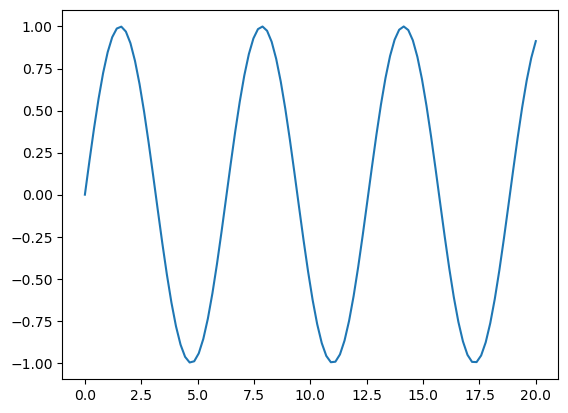

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
x = np.linspace(0, 20, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

Matplotlib has many functions to display data. For images as 2D matrices, it doesn't use the <code>plot</code> function, but the <code>imshow</code> function. If we visualize the 21st slice in our 64-slice CT image, we get the following image.

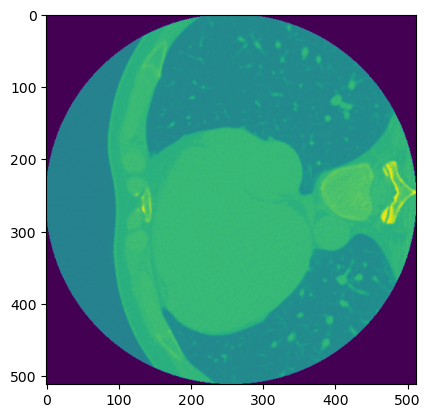

In [20]:
plt.figure()
plt.imshow(image_array[:, :, 20])
plt.show()

Now we see what's actually in the image. It's a CT scan of a heart, where we see (on the left) the chest wall, in the center the heart, and on the right the spine. Surrounding the heart is lung tissue. However, if you would show the image like this to a radiologist, they would be confused. First of all, they are used to seeing CT images in grayscale. We can fix that by changing the [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to <code>gray</code>. 

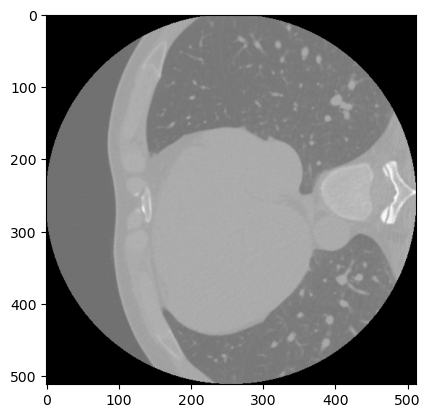

In [21]:
plt.figure()
plt.imshow(image_array[:, :, 20], cmap = 'gray')
plt.show()

A second problem is that the image is rotated 90 degrees counterclockwise. This is because when talking about images, we typically use different axes than when talking about plots. For example, coordinate (20, 10) in an image means 21st row (remember we start counting at 0), 11th column. In a plot, it would mean 21st *column*, 11th *row*. So to fix that, we need to swap axes in our visualization. Because the image slice is a 2D matrix, we can just use <code>transpose</code>

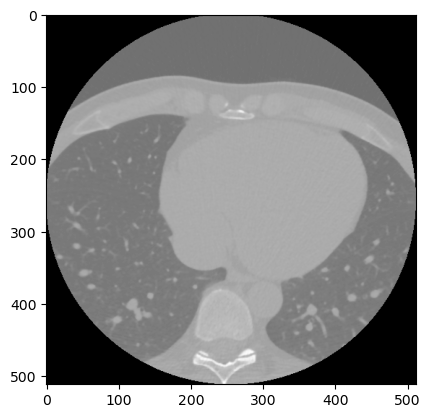

In [22]:
plt.figure()
plt.imshow(image_array[:, :, 20].transpose(), cmap='gray')
plt.show()

That's more like it! Now, you may notice that the image does not show a lot of contrast. First of all, let's see which image values are present in the image.

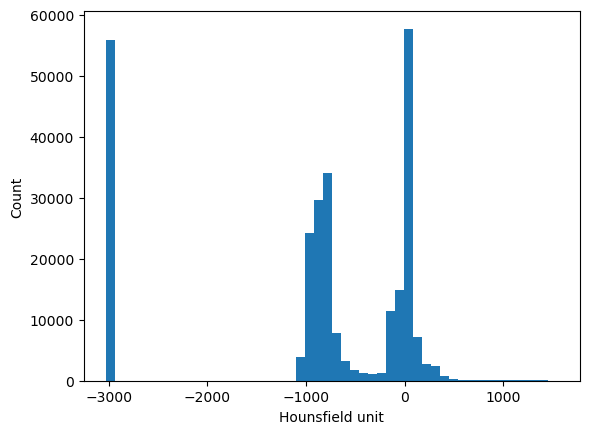

In [23]:
plt.figure()
plt.hist(image_array[:, :, 20].flatten(), bins=50)
plt.xlabel('Hounsfield unit')
plt.ylabel('Count')
plt.show()

### Image intensities

The histogram shows a wide range of image intensities ([Hounsfield units](https://en.wikipedia.org/wiki/Hounsfield_scale)) in the image. For visualization, you might only be interested in values between 0 and 100.There are several ways to focus on different parts of the image. 
- You can change the values in the image using something like <code>image_array = np.clip(image_array, 0, 100)</code>
- You can use the <code>vmin</code> and <code>vmax</code> options to limit the range of visible values. 
The latter option is preferable as it doesn't change the data.

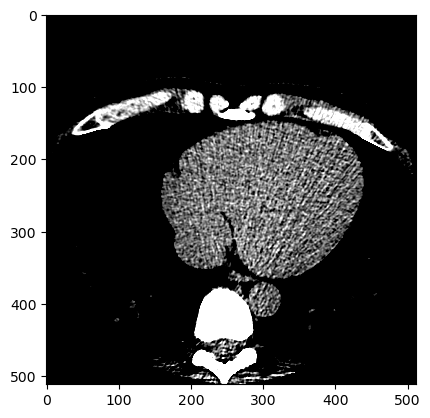

In [24]:
plt.figure()
plt.imshow(image_array[:, :, 20].transpose(), cmap='gray', vmin=0, vmax=100)
plt.show()

:::{admonition} Exercise
:class: tip
A reasonable range for non-contrast cardiac CT images is between -300 and 450. Visualize the image with these limits.
:::

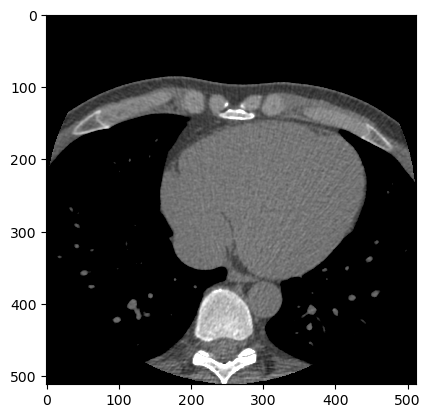

In [25]:
plt.figure()
plt.imshow(image_array[:, :, 20].transpose(), cmap='gray', vmin=-300, vmax=450)
plt.show()

:::{admonition} Exercise
:class: tip
The image that we have just visualized is an *axial* image slice. Can you also visualize a *sagittal* and a *coronal* image slice of the same 3D volume? Use the [aspect](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imshow.html) option in Matplotlib to correct for the anisotropic pixel size.
:::

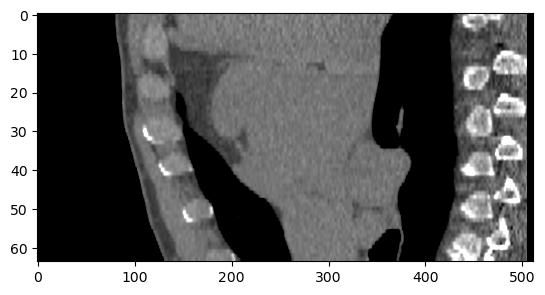

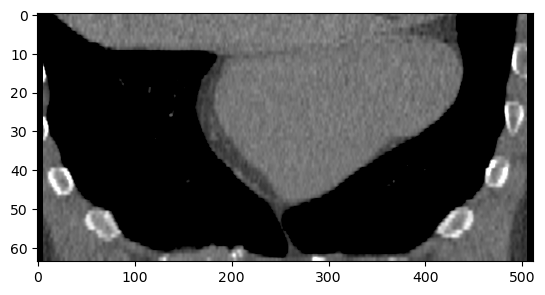

In [37]:
#saggital slice:
plt.figure()
plt.imshow(image_array[200, :, :].transpose(), cmap='gray', vmin=-300, vmax=450, aspect=4)
plt.show()

#coronal slice:
plt.figure()
plt.imshow(image_array[:, 200, :].transpose(), cmap='gray', vmin=-300, vmax=450, aspect=4)
plt.show()

## MeVisLab
This is the end of this first Jupyter notebook. Notebooks are great for interactive Python programming, but not for medical image visualization. We have put a tutorial online to get started with MeVisLab. Follow this tutorial to visualize 3D medical images in an interactive way!

<img src='https://i.imgur.com/W0ZYWg0.png'></img>

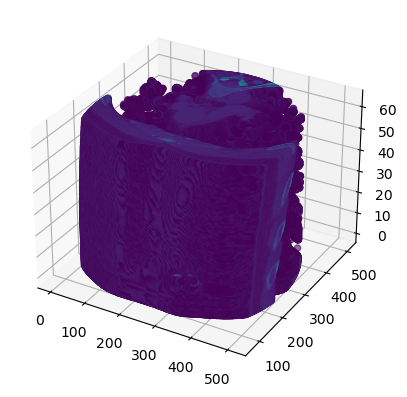

In [35]:
#now plot the image as a 3d point cloud
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = np.where(image_array > -300)
ax.scatter(x, y, z, c=image_array[x, y, z], cmap='gray')
plt.show()